In [1]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

In [2]:
file_mat = 'logl_test_data.mat'
# list all varaiables in Matlab file file_mat
sp.io.whosmat(file_mat)

MAT = sp.io.loadmat(file_mat)
d0 = MAT['d0_2'].flatten()
dstd = MAT['dstd_2'].flatten()
#d0 = MAT['d0_1'].flatten()
#dstd = MAT['dstd_1'].flatten()


def loglikelihood(d, d_obs, d_std):
    f = -0.5 * np.sum((d_obs - d) ** 2 / (d_std ** 2))
    return f



In [3]:
N=10000
nd = d0.shape[0]
d_sample = np.zeros((nd,N))
nlogL_sample = np.zeros((N)) # negative log likelihood
for i in range(N):
    # generate a sample from N(d0,dstd)
    d_real = np.random.normal(d0,dstd)
    d_sample[:,i] = d_real
    nlogL_sample[i]=-loglikelihood(d_real, d0, dstd)    


sample_mean = np.mean(nlogL_sample)
sample_std = np.std(nlogL_sample)

normal_mean = nd/2
normal_std = np.sqrt(nd/2)

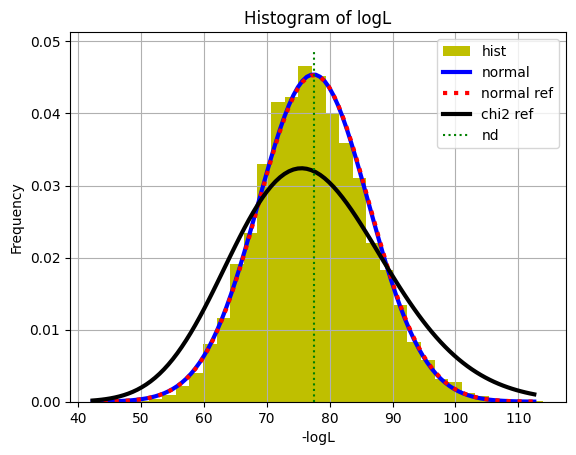

In [4]:
plt.figure()
plt.hist(nlogL_sample, bins=30, density=True, label='hist', color='y')
plt.xlabel('-logL')
plt.ylabel('Frequency')
plt.title('Histogram of logL')
# make a numpy array plt.xlim, in 100 bins
x_arr = np.linspace(sample_mean-4*sample_std, sample_mean+4*sample_std, 100)
# compute the normal distribution at x_arr
pdf_normal = sp.stats.norm(sample_mean, sample_std).pdf(x_arr)
pdf_normal_ref = sp.stats.norm(normal_mean, normal_std).pdf(x_arr)
pdf_chi2 = sp.stats.chi2(nd/2).pdf(x_arr)

plt.plot(x_arr,pdf_normal,'b-', linewidth=3, label='normal')
plt.plot(x_arr,pdf_normal_ref,'r:', linewidth=3, label='normal ref' )
plt.plot(x_arr,pdf_chi2,'k-', linewidth=3,label='chi2 ref')
plt.plot([nd/2,nd/2],plt.ylim(),'g:', label='nd')
plt.grid()
plt.legend()
plt.show()